In [1]:
import numpy
import matplotlib.patches as patches
import drjit as dr
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PDE.Coefficient import *
from PDE.utils import *
from PDE.BoundaryShape import *
from PDE.Solver import *
from PDE.Solver.constant.wos_constant import Particle
from PDE import Float,Point2f, GreenSampling, ArrayXb

In [2]:
green = GreenSampling.Polynomial
conf_numbers = [UInt32(0), UInt32(1)]
conf_vis = 0
epsilon = 1e-3


In [3]:


def boundary(points, parameters):
    angle = dr.atan2(points[0], points[1])
    return parameters["scale"] * dr.sin(angle * parameters["freq"]) + parameters["bias"]
parameters1_n = {}
parameters1_n["freq"] = 1
parameters1_n["bias"] = 12
parameters1_n["scale"] = 12
parameters2_n = {}
parameters2_n["freq"] = 4
parameters2_n["bias"] = 8
parameters2_n["scale"] = 8

neumann1 = FunctionCoefficient("neumann", parameters1_n, boundary)
neumann2 = FunctionCoefficient("neumann", parameters2_n, boundary)
dirichlet = ConstantCoefficient("dirichlet", 11)
#dirichlet2 = ConstantCoefficient("dirichlet1", )
shape = load_bunny(scale = 1, dirichlet = [dirichlet], neumann = [neumann1, neumann2], epsilon = epsilon, conf = 4)

In [4]:
bbox = [[-1, -1], [1, 1]]
resolution_image = [128, 128]
spp_image = 128


res = 128
spp_boundary = 2 ** 17

source_p = {}
source_p["radius"] = 0.5
source_p["val"] = 10

def source(points, params):
    return dr.select(dr.norm(points) <= params["radius"], params["val"], 0.0)

f = FunctionCoefficient("f", source_p, source)

σ = ConstantCoefficient("screening", 0)


data_holder = DataHolder(shape = shape,σ = σ, f=f)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


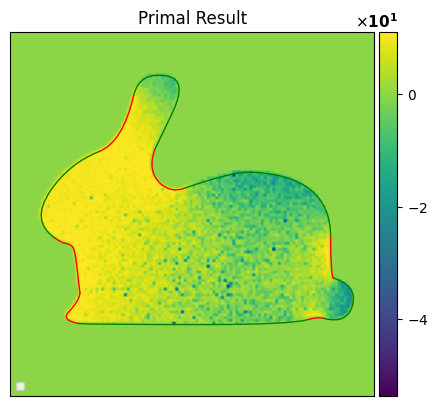

In [5]:
points = create_image_points(bbox, resolution_image, spp_image)
wos = WostConstant(data_holder, green_sampling=green)
L, p = wos.solve(points_in = points, conf_numbers = conf_numbers)
image_0, tensor, variance1, _ = create_image_from_result(L, resolution_image, compute_std=True)
fig, (ax1) = plt.subplots(1, 1, figsize=[5, 5])
plot_image(image_0[conf_vis], ax1)
ax1.set_title("Primal Result")
shape.sketch(ax1, bbox, resolution_image)
ax1.legend(loc = "lower left", fontsize = 8)

In [6]:
np.save("bad_sampling_low.npy", image_0[conf_vis])

In [7]:
np.save("bad_sampling_variance_low.npy", variance1[conf_vis])

: 